<a href="https://colab.research.google.com/github/Lebengeniesser/Pytorch_Practice/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


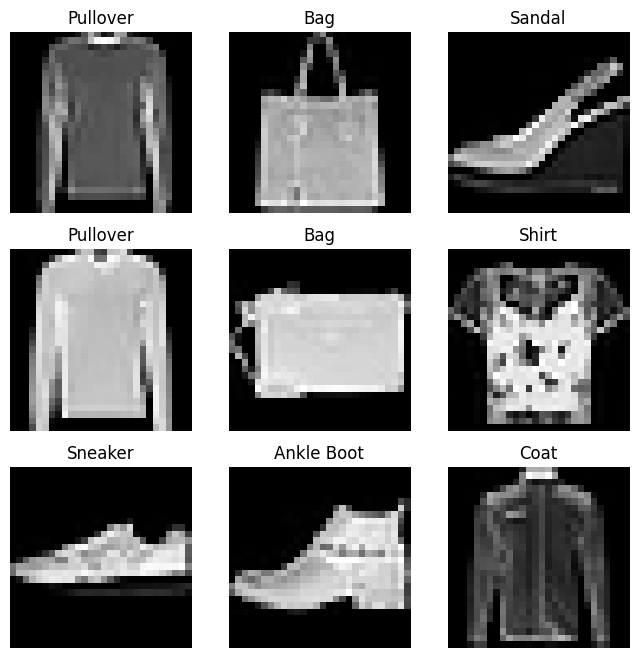

In [26]:
seconds_in_a_day = 24 * 60 *60
seconds_in_a_day
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week
#Pytorch 데이터 작업하기
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

 #공개 데이터셋에서 학습 데이터를 내려받습니다.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
#데이터셋을 순회하고 시각화하기
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#파일에서 사용자 정의 데이터셋 만들기
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, naems=['fill_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
    #init함수는 Dataset객체가 생성되때 한번만 실행된다.

  def __len__(self):
    return len(self.img_labels)
#len 함수는 데이터셋의 샘플 개수를 반환한다.
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_imgae(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(imgae)
    if self.target_transform:
      label = self.target_trandsform(label)
    return image, label
#getitem함수는 주어진 인덱스 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환한다.  
#===============================================


  